In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the image
image1 = cv2.imread('C:\\Users\\student\\Downloads\\lena.jpg')
image2 = cv2.imread('C:\\Users\\student\\Downloads\\msd.jpg')
image1

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [3]:
image2

array([[[ 27,  35,  34],
        [ 28,  36,  35],
        [ 30,  38,  37],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22]],

       [[ 28,  36,  35],
        [ 29,  37,  36],
        [ 31,  39,  38],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22]],

       [[ 29,  37,  36],
        [ 31,  39,  38],
        [ 33,  41,  40],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22]],

       ...,

       [[ 83, 168, 154],
        [ 83, 168, 154],
        [ 83, 168, 154],
        ...,
        [ 79, 122, 101],
        [ 74, 118,  95],
        [ 71, 113,  90]],

       [[ 83, 168, 154],
        [ 83, 168, 154],
        [ 83, 168, 154],
        ...,
        [ 79, 122, 101],
        [ 74, 118,  95],
        [ 72, 114,  91]],

       [[ 83, 168, 154],
        [ 83, 168, 154],
        [ 83, 168, 154],
        ...,
        [ 80, 123, 102],
        [ 75, 119,  96],
        [ 72, 114,  91]]

In [4]:
# Display the image using OpenCV
cv2.imshow('Original', image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.imshow('Original', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

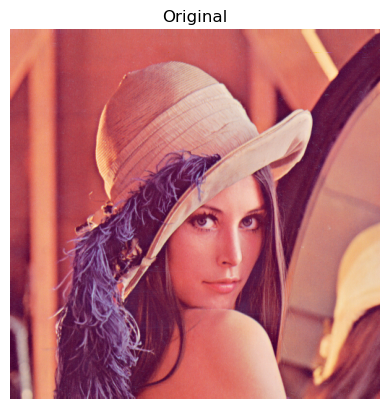

In [6]:
# Convert BGR image to RGB for matplotlib display
img1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display the RGB image using matplotlib
plt.axis('off')
plt.imshow(img1_rgb)
plt.title('Original')
plt.show()

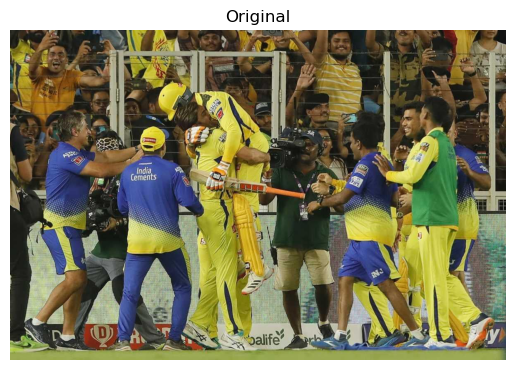

In [7]:
img2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the RGB image using matplotlib
plt.axis('off')
plt.imshow(img2_rgb)
plt.title('Original')
plt.show()

***1.RGB TO GRAYSCALE CONVERSION***

In [8]:
# Convert the original BGR image to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image1 = cv2.equalizeHist(gray_image1)

gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image2 = cv2.equalizeHist(gray_image2)

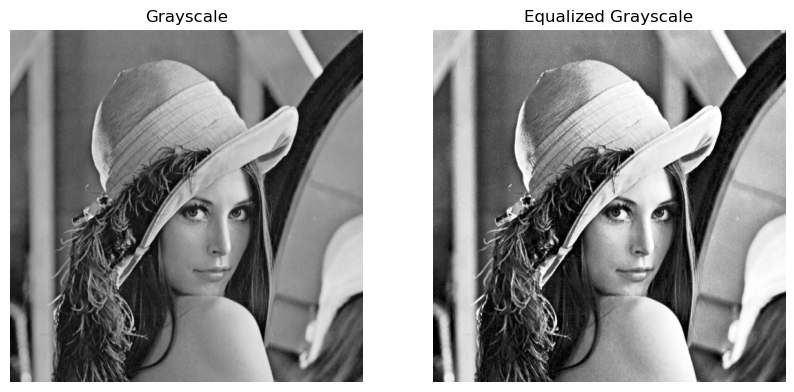

In [9]:
# Display the original grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray_image1, cmap='gray')
plt.title('Grayscale')

# Display the equalized grayscale image
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(equalized_image1, cmap='gray')
plt.title('Equalized Grayscale')
plt.show()


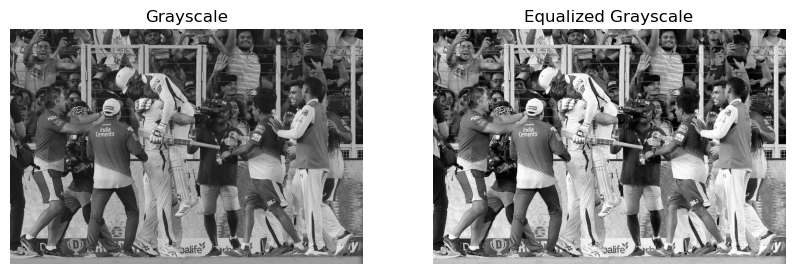

In [10]:
# Display the original grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray_image2, cmap='gray')
plt.title('Grayscale')

# Display the equalized grayscale image
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(equalized_image2, cmap='gray')
plt.title('Equalized Grayscale')
plt.show()

***2.MANUAL GRAYSCALE CONVERSION***

In [11]:
# Manual Grayscale Conversion
# Extract RGB channels
R, G, B = image1[:, :, 2], image1[:, :, 1], image1[:, :, 0]

# Apply the formula to convert to grayscale manually
gray_image_manual1 = 0.2989 * R + 0.5870 * G + 0.1140 * B
gray_image_manual1 = gray_image_manual1.astype(np.uint8)  # Convert to 8-bit integer


In [12]:
# Manual Histogram Equalization
# Step 1: Calculate the histogram of the grayscale image
histogram, bin_edges = np.histogram(gray_image_manual1.flatten(), bins=256, range=[0, 256])

# Step 2: Compute the cumulative distribution function (CDF)
cdf = histogram.cumsum()

# Step 3: Normalize the CDF to the range [0, 255]
cdf_normalized = cdf * 255 / cdf[-1]

# Step 4: Map the original pixel values to equalized values using the CDF
equalized_image1 = np.interp(gray_image_manual1.flatten(), bin_edges[:-1], cdf_normalized)

# Reshape the flattened image back to the original shape
equalized_image1 = equalized_image1.reshape(gray_image_manual1.shape).astype(np.uint8)


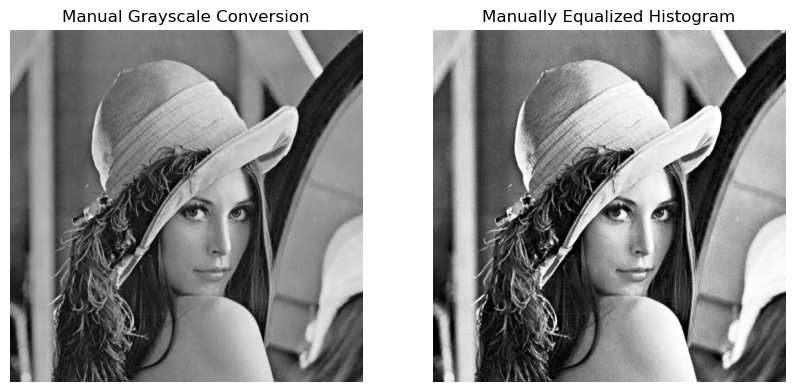

In [13]:
# Display the manually converted grayscale image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray_image_manual1, cmap='gray')
plt.title('Manual Grayscale Conversion')

# Display the manually equalized grayscale image
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(equalized_image1, cmap='gray')
plt.title('Manually Equalized Histogram')
plt.show()

In [14]:
# Manual Grayscale Conversion
# Extract RGB channels
R, G, B = image2[:, :, 2], image2[:, :, 1], image2[:, :, 0]

# Apply the formula to convert to grayscale manually
gray_image_manual2 = 0.2989 * R + 0.5870 * G + 0.1140 * B
gray_image_manual2 = gray_image_manual2.astype(np.uint8)  # Convert to 8-bit integer


In [15]:
# Manual Histogram Equalization
# Step 1: Calculate the histogram of the grayscale image
histogram, bin_edges = np.histogram(gray_image_manual2.flatten(), bins=256, range=[0, 256])

# Step 2: Compute the cumulative distribution function (CDF)
cdf = histogram.cumsum()

# Step 3: Normalize the CDF to the range [0, 255]
cdf_normalized = cdf * 255 / cdf[-1]

# Step 4: Map the original pixel values to equalized values using the CDF
equalized_image2 = np.interp(gray_image_manual2.flatten(), bin_edges[:-1], cdf_normalized)

# Reshape the flattened image back to the original shape
equalized_image2 = equalized_image2.reshape(gray_image_manual2.shape).astype(np.uint8)

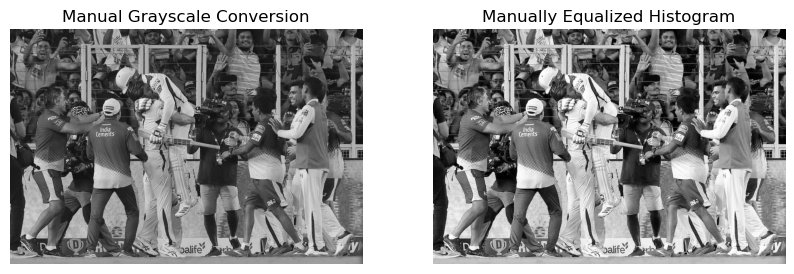

In [16]:
# Display the manually converted grayscale image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray_image_manual2, cmap='gray')
plt.title('Manual Grayscale Conversion')

# Display the manually equalized grayscale image
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(equalized_image2, cmap='gray')
plt.title('Manually Equalized Histogram')
plt.show()

In [ ]:
# Plot histograms for the original and equalized images
plt.figure(figsize=(12, 6))

# Original grayscale image histogram
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of Original Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized image histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

***HISTOGRAM***

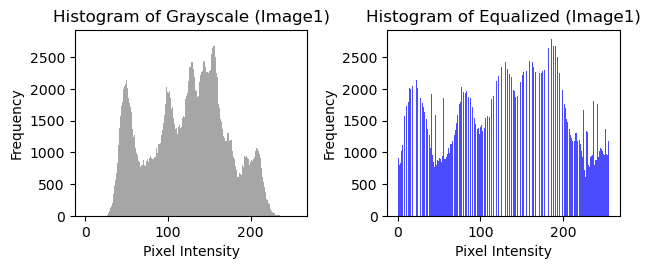

In [24]:
# Grayscale image histogram
plt.subplot(2, 2, 1)
plt.hist(gray_image_manual1.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of Grayscale (Image1)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized image histogram
plt.subplot(2, 2, 2)
plt.hist(equalized_image1.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram of Equalized (Image1)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


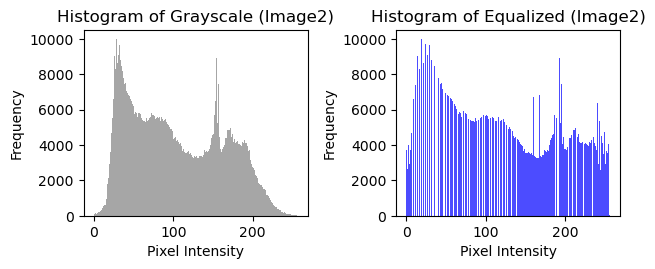

In [25]:
# Grayscale image histogram
plt.subplot(2, 2, 3)
plt.hist(gray_image_manual2.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title("Histogram of Grayscale (Image2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized image histogram
plt.subplot(2, 2, 4)
plt.hist(equalized_image2.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram of Equalized (Image2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

***3.IMAGE RESIZE***

In [17]:
image1.shape

(512, 512, 3)

In [18]:
image2.shape

(799, 1200, 3)

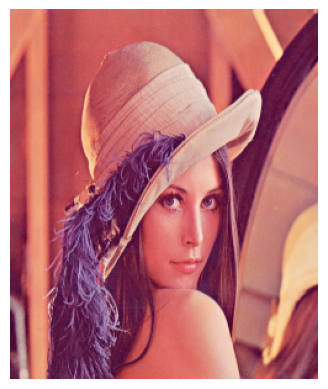

In [19]:
# Resize the image
resized_image1 = cv2.resize(img1_rgb, (250, 300))

# Display the resized image
plt.imshow(resized_image1)
plt.axis("off")
plt.show()

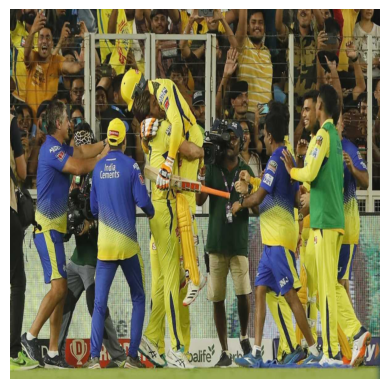

In [20]:
# Resize the image
resized_image2 = cv2.resize(img2_rgb, (700, 700))

# Display the resized image
plt.imshow(resized_image2)
plt.axis("off")
plt.show()